## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


## Loading Model

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

Saving trained_model.keras to trained_model.keras
User uploaded file "trained_model.keras" with length 127866882 bytes


In [7]:
model = tf.keras.models.load_model('trained_model.keras')

In [8]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     9,438,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,948,244 (121.87 MB)

 Trainable params: 10,649,414 (40.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,298,830 (81.25 MB)

### Visualizing Single Image of Test Set

In [5]:
!gdown https://drive.google.com/uc?id=1ITP75T-5CdS1_ccICyLdgOx-8_PaFSHV
!unzip Plant_Disease_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Plant_Disease_Dataset/train/Potato___healthy/5ea316eb-10a2-42c0-b781-40d90356ccaa___RS_HL 1935.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___healthy/._5ea316eb-10a2-42c0-b781-40d90356ccaa___RS_HL 1935.JPG  
  inflating: Plant_Disease_Dataset/train/Potato___healthy/54f86311-9d76-421b-b401-0b02f6e738a5___RS_HL 4172_new90degFlipLR.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___healthy/._54f86311-9d76-421b-b401-0b02f6e738a5___RS_HL 4172_new90degFlipLR.JPG  
  inflating: Plant_Disease_Dataset/train/Potato___healthy/22322780-95b4-4b45-b626-26b22965d55e___RS_HL 1880_90deg.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___healthy/._22322780-95b4-4b45-b626-26b22965d55e___RS_HL 1880_90deg.JPG  
  inflating: Plant_Disease_Dataset/train/Potato___healthy/3c0d6888-c7e1-4cf8-9c25-9a0b8c62ba72___RS_HL 1780_new90degFlipTB.JPG  
  inflating: __MACOSX/Plant_Disease_Dataset/train/Potato___he

In [12]:
!pip install opencv-python

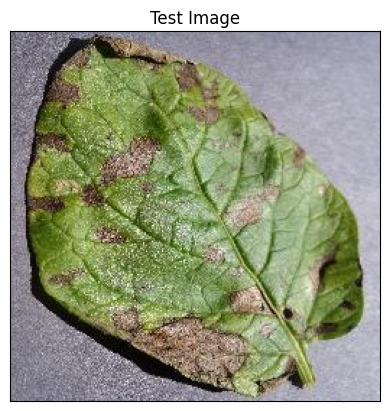

In [21]:
import cv2
image_path = "/content/Plant_Disease_Dataset/test/test/PotatoEarlyBlight1.JPG"
#Reading Image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(image)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [22]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [23]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


(array([[1.6909490e-18, 6.8252041e-18, 7.5337956e-20, 1.7197695e-23,
         8.3725696e-32, 1.1259486e-22, 6.0068003e-23, 8.0326210e-16,
         9.2970465e-14, 3.6469070e-17, 1.1946498e-29, 1.5643814e-23,
         1.0222361e-21, 7.4536524e-17, 2.8816552e-30, 3.4121697e-30,
         9.4663755e-10, 6.5422882e-25, 1.1061632e-10, 4.1812326e-24,
         1.0000000e+00, 4.4669230e-16, 2.0739301e-17, 1.3671623e-21,
         2.5544909e-26, 1.4736190e-24, 1.2599243e-09, 2.7105110e-26,
         6.3279613e-23, 5.4322218e-08, 5.4374504e-14, 2.3121957e-19,
         9.7832598e-10, 2.2408523e-26, 1.4717689e-19, 1.9793369e-23,
         8.3303829e-26, 9.7757707e-23]], dtype=float32),
 (1, 38))

In [24]:
result_index = np.argmax(prediction)
result_index

np.int64(20)

In [25]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

### Displaying Result of Disease Prediction

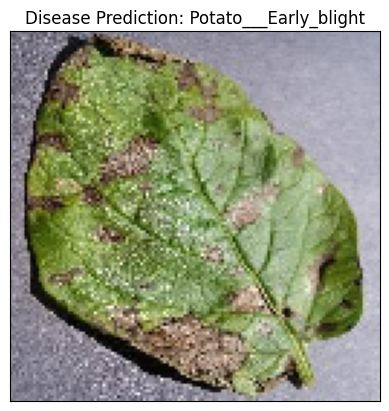

In [26]:
model_prediction = class_name[result_index]
plt.imshow(image)
plt.title(f"Disease Prediction: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()